In [ ]:
"""The final plot solution is 
    1. seaborn
        refer tutorial(10 min master seaborn) : https://zhuanlan.zhihu.com/p/49035741
    2. plt.style.context(['science',"ieee",'no-latex'])
    3. matplotlib adjust the details
    4.inkscape manually adjust

    ? just wrap the seaborn with style?
    """
#TODO 1. line, bar,multi warp on top of seaborn with scientific style & matplotlib details 2 import from color libaray

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import sys
sys.path.append("..") 
from plot.colors import Colors
colors = Colors.colors()

# Seting color list or dict
color = Colors.light_colors()
# color = [colors['light green'][3], colors['light blue'][3], colors['grey'][3]]
#color = ['lightgreen','lightblue','lightgrey','black','red','green','orange','blue','limegreen','darkgreen','royalblue','navy']
# camp = plt.get_cmap("rainbow")

# Specify the mean and standard deviation for each mock data group
data_specs = [(2, 2), (7, 1), (4, 2.5), (10, 0.5), (5.5, 0.1)]

# Generate data and place into a pandas DataFrame
data = [np.random.normal(mu, sigma, 10) for mu, sigma in data_specs]
data = pd.DataFrame(data).T
data.columns = ['Group_%s' % n for n in range(1,6)]

# Get the means of each group
means = data.mean()
x = np.arange(len(means))

# Define variables for limits
xlims = (-1, 5)
ylims = (-5, 15)

error_kw = {'capsize': 2, 'capthick': 0.5, 'ecolor': 'black'}

In [3]:
def barplot(save_path=None,title=None, *arg,**kwarg):
    """just wrap seaborn is almost enough"""
    with plt.style.context(['science',"nature",'no-latex']):  # ,"ieee"
        

        fig, ax = plt.subplots()

        sns.barplot(palette=color,*arg,**kwarg)
        ax.tick_params(right=False,  top=False) 
        ax.tick_params(right=False, which='minor', top=False)
        ax.legend(title=None)
        ax.set(title = title)
        
        sns.despine()
        if save_path:
            plt.savefig(f'{save_path}.jpg',dpi=600)
            plt.savefig(f'{save_path}.svg',dpi=600)
    return ax

def distplot(save_path = None, *arg,**kwarg):
    """just wrap seaborn is almost enough"""
    with plt.style.context(['science','no-latex']):  # ,"ieee"

        
        fig, ax = plt.subplots()
        sns.distplot(*arg,**kwarg)
        
        ax.tick_params(right=False,  top=False) 
        ax.tick_params(right=False, which='minor', top=False) 
        sns.despine()
        
        if save_path:
           fig.savefig(f'{save_path}.jpg',dpi=600)
           plt.savefig(f'{save_path}.svg',dpi=600)
    

def countplot(save_path=None, *arg,**kwarg):
    """just wrap seaborn is almost enough"""
    with plt.style.context(['science',"nature",'no-latex']):  # ,"ieee"
        

        fig, ax = plt.subplots()

        sns.countplot(palette=color,*arg,**kwarg)
        ax.tick_params(right=False,  top=False) 
        ax.tick_params(right=False, which='minor', top=False)

        sns.despine()
        if save_path:
            plt.savefig(f'{save_path}.jpg',dpi=600)
            plt.savefig(f'{save_path}.svg',dpi=600)

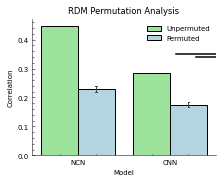

In [5]:
xlabels = ['NCN', 'CNN']
listA = [1-0.552285,1-0.716834]
listB = [0.2305,0.175554] # 0.22 # 0.
errorA = [0,0]
errorB = [0.01,0.01]
error_kw = {'capsize': 2, 'capthick': 0.5, 'ecolor': 'black'}
ylabel = 'Similarity'
title = 'Similarity Comparison after Categories Permutation'
labels = ["Unpermuted","Permuted"]

data = {"Model":xlabels*4,"Correlation":[1-0.552285,1-0.716834,0.2305,0.175554,0.2305-errorB[0],0.175554-errorB[0],0.2305+errorB[0],0.175554+errorB[0]],
        "Condition":["Unpermuted","Unpermuted","Permuted","Permuted","Permuted","Permuted","Permuted","Permuted"],
        }  #"Error":[None,None,0.01,0.01]
df = pd.DataFrame(data=data)
title = "RDM Permutation Analysis"
ax = barplot(title = title, x="Model",y="Correlation",hue='Condition',data=df,edgecolor = "black",capsize=.02,errwidth=1)
for i in range(2):
        ax.axhline(0.35-0.01*i,xmin=1-(listA[i]-listB[i]), xmax=1,color="black") #,color=color[i]
# ax.set(title = "RDM Permutation Analysis among Humans, NCN and CNN")
plt.savefig(f"figures/test_title.jpg",dpi=600)

In [6]:
df

,Model,Correlation,Condition
0,NCN,0.447715,Unpermuted
1,CNN,0.283166,Unpermuted
2,NCN,0.230500,Permuted
3,CNN,0.175554,Permuted
4,NCN,0.220500,Permuted
5,CNN,0.165554,Permuted
6,NCN,0.240500,Permuted
7,CNN,0.185554,Permuted


In [7]:
df_boostrap = pd.read_csv("data/shuffled_bootstrapping_vs_permutation.csv") ##06_2022_results0_31bootstrapping_vs_permutation.csv")
# df_boostrap["Condition"][:10000] = "Bootstrapping"
df_boostrap

,Unnamed: 0,Model,Correlation,Condition
0,0,NCN,0.447308,Bootstrapping
1,1,NCN,0.586204,Bootstrapping
2,2,NCN,0.456231,Bootstrapping
3,3,NCN,0.777406,Bootstrapping
4,4,NCN,0.390640,Bootstrapping
...,...,...,...,...
19995,19995,CNN,0.096056,Permuted
19996,19996,CNN,0.068562,Permuted
19997,19997,CNN,0.047173,Permuted
19998,19998,CNN,0.114363,Permuted


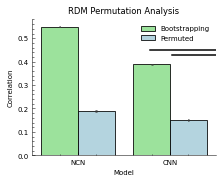

In [9]:
title = "RDM Permutation Analysis"
ax = barplot(title = title, x="Model",y="Correlation",hue='Condition',data=df_boostrap,edgecolor = "black",linewidth=.8, capsize=.02,errwidth=.5)
# listA = [ 0.55, 0.39]
# listB= [0.226, 0.174]
gaps = [0.5495846582948681,
 0.38873725393736747,
 0.18833112942713803,
 0.14993907936776774]
for i in range(2):
        ax.axhline(0.45-0.02*i,xmin=1-(gaps[i]-gaps[i+2]), xmax=1,color="black") #,color=color[i] # 0.55, 0.39 # 0.2262, 0.174 -->0.32 0.22
# ax.set(title = "RDM Permutation Analysis among Humans, NCN and CNN")
plt.savefig(f"figures/bootstrapping_vs_permutation.jpg",dpi=600)

In [9]:

df_corr = pd.read_csv("data/06_2022_results0_31gap_corr.csv")
df_corr 

,Unnamed: 0,NCN,CNN,NCN_relative,CNN_relative
0,0,0.849446,0.792107,0.836433,0.823004
1,1,1.034631,0.933361,1.080138,0.959481
2,2,0.631328,0.684715,0.917459,0.854538
3,3,0.746782,1.049156,0.940814,1.271830
4,4,0.986302,0.920129,0.980058,0.904827
...,...,...,...,...,...
4995,4995,0.946898,1.001427,0.928364,0.914521
4996,4996,1.027752,0.906994,1.027019,0.878891
4997,4997,1.031446,0.758941,1.467445,1.132829
4998,4998,1.222104,1.184776,1.419184,1.261632


ValueError: Could not interpret input 'Model'

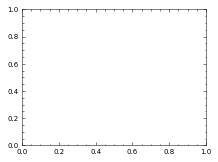

In [11]:
title = "Effects correlation analysis"
ax = barplot(title = title, x="Model",y="Correlation",hue='Condition',data=df_corr,edgecolor = "black",linewidth=.8, capsize=.02,errwidth=.5)
plt.savefig(f"figures/Effects_correlation_analysis.jpg",dpi=600)

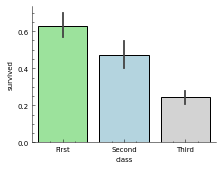

In [27]:
titanic=sns.load_dataset('titanic')
barplot_save_path = "figures/barplot"
barplot(barplot_save_path,x='class',y='survived',data=titanic,edgecolor = "black")

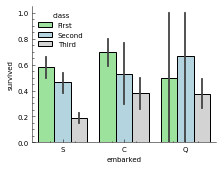

In [28]:
barplot(x='embarked',y='survived',
                    hue='class',data=titanic,edgecolor = "black")

/rds/user/hpczeji1/hpc-work/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


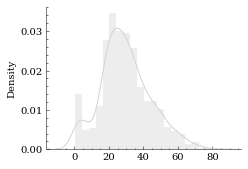

In [68]:
multibar_save_path = "figures/multi_barplot"
distplot(multibar_save_path, x = titanic['age'].dropna(), color=color[2])

/rds/user/hpczeji1/hpc-work/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


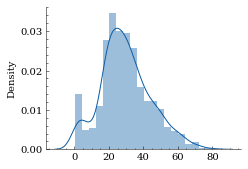

In [63]:
distplot(x = titanic['age'].dropna())

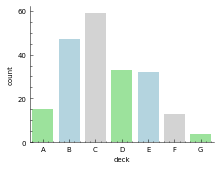

In [67]:
countplot(x='deck',data=titanic)

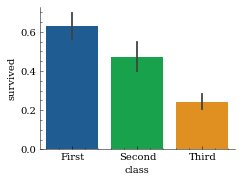

In [20]:
with plt.style.context(['science','no-latex']):  # ,"ieee"

    
    fig, ax = plt.subplots()
    sns.barplot(x='class',y='survived',data=titanic)
    ax.tick_params(right=False,  top=False) 
    ax.tick_params(right=False, whicbh='minor', top=False) 
    sns.despine()

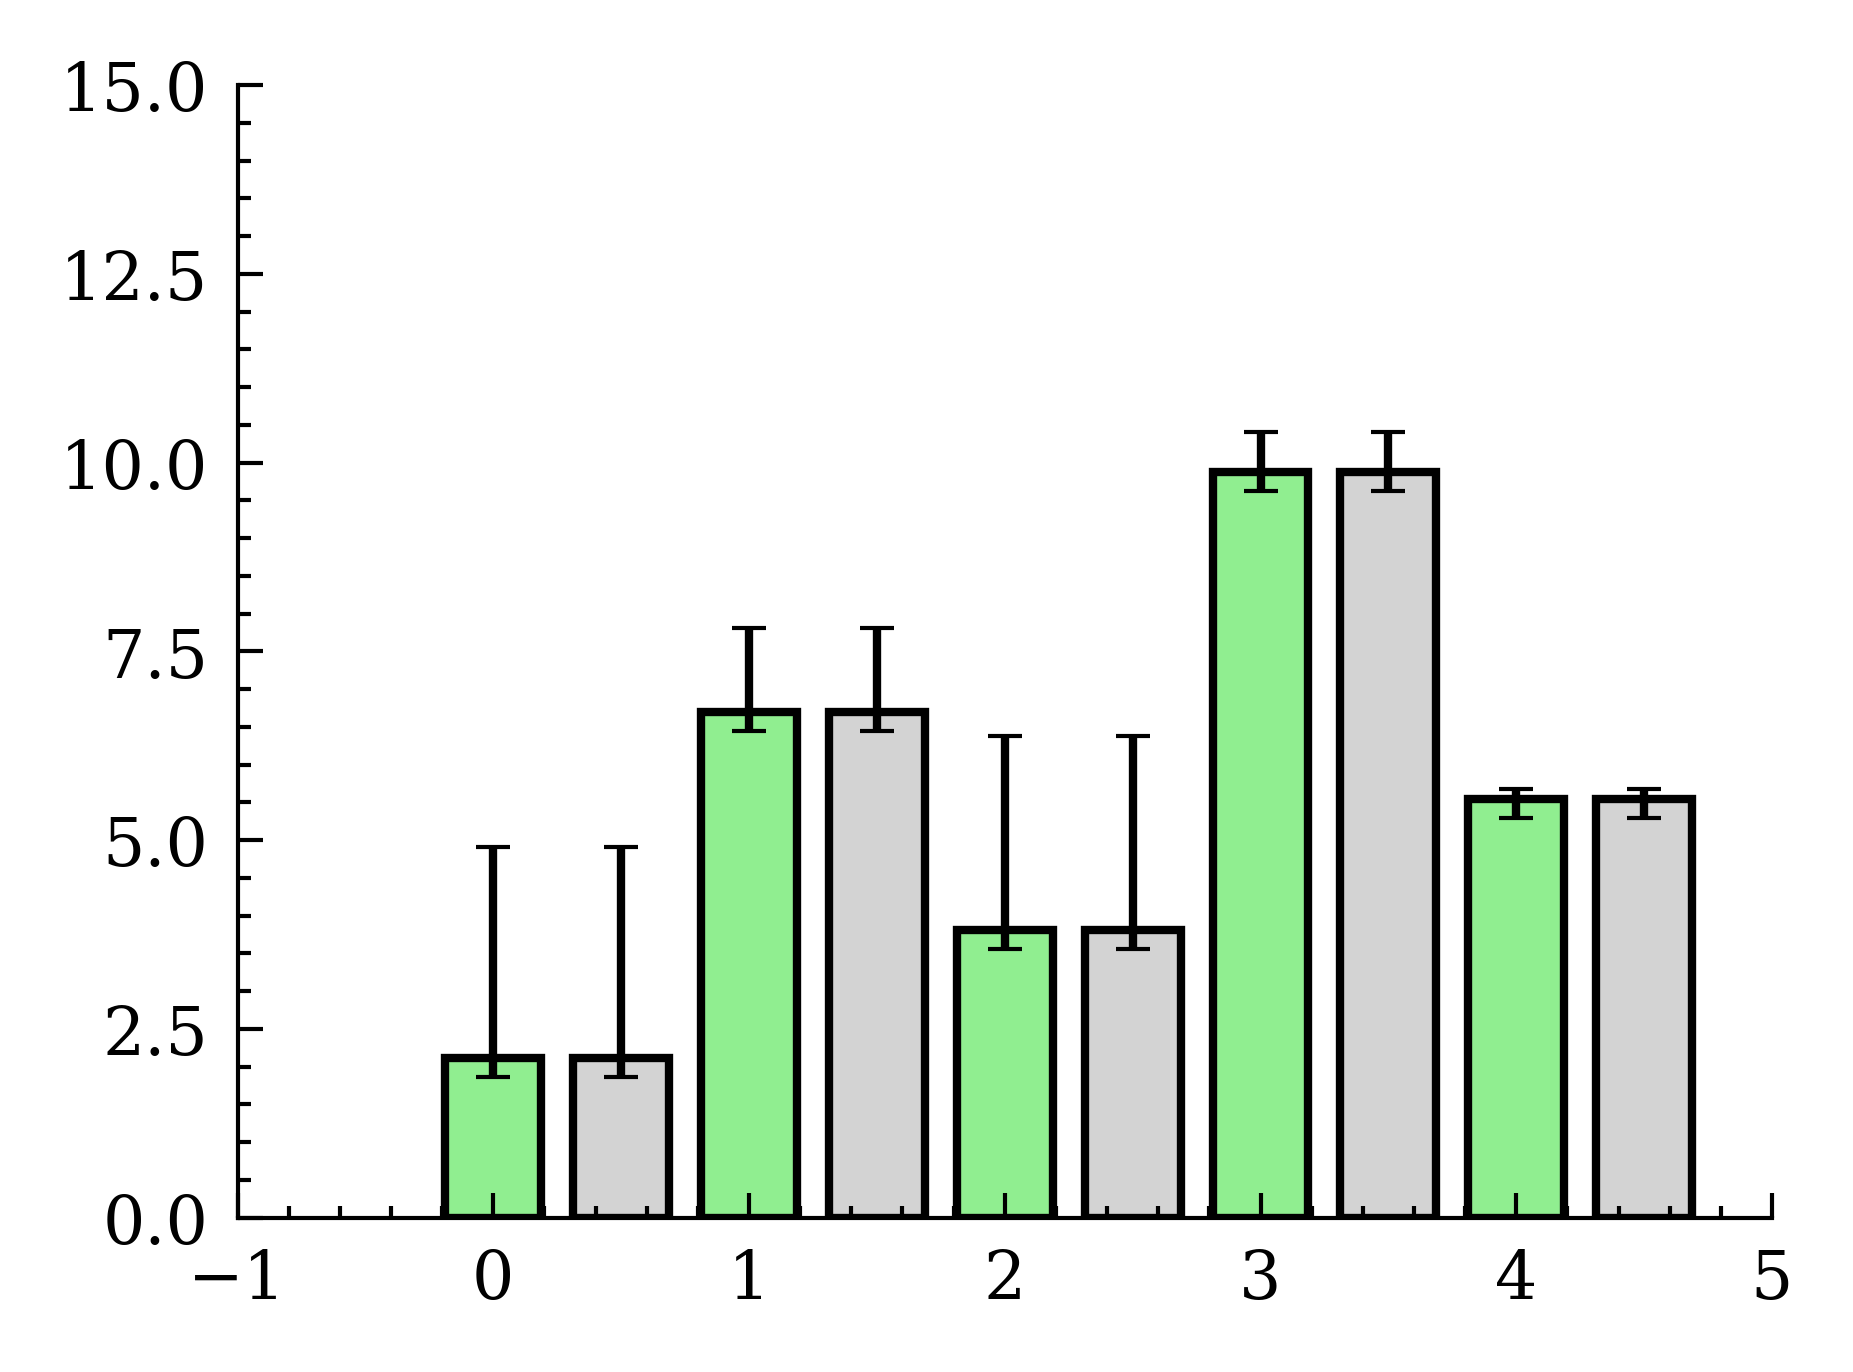

In [100]:


with plt.style.context(['science',"ieee",'no-latex']):
    fig, ax = plt.subplots()

    # Width of each bar in x-coordinates
    width = 0.75

    stdev = data.std()
    # Positive error bars only
    error = [np.zeros(len(stdev))+0.25, stdev]

    # ax.bar(x-0.5, means, color='lightblue', edgecolor = "black", width=width/2, yerr=error, error_kw=error_kw, align='center')
    ax.bar(x, means, color='lightgreen',edgecolor = "black", width=width/2, yerr=error, error_kw=error_kw, align='center')
    ax.bar(x+0.5, means, color='lightgrey',edgecolor = "black", width=width/2, yerr=error, error_kw=error_kw, align='center')

    ax.set_xlim(xlims)
    ax.set_ylim(0, 15)
    ax.tick_params(right=False,  top=False) 
    ax.tick_params(right=False, which='minor', top=False) 
    sns.despine()
    



'#ffebee'

In [5]:
colors.colors

{'red': {0: '#ffebee',
  1: '#ffcdd2',
  2: '#ef9a9a',
  3: '#e57373',
  4: '#ef5350',
  5: '#f44336',
  6: '#e53935',
  7: '#d32f2f',
  8: '#c62828',
  9: '#b71c1c'},
 'pink': {0: '#fce4ec',
  1: '#f8bbd0',
  2: '#f48fb1',
  3: '#f06292',
  4: '#ec407a',
  5: '#e91e63',
  6: '#d81b60',
  7: '#c2185b',
  8: '#ad1457',
  9: '#880e4f'},
 'purple': {0: '#f3e5f5',
  1: '#e1bee7',
  2: '#ce93d8',
  3: '#ba68c8',
  4: '#ab47bc',
  5: '#9c27b0',
  6: '#8e24aa',
  7: '#7b1fa2',
  8: '#6a1b9a',
  9: '#4a148c'},
 'deep purple': {0: '#ede7f6',
  1: '#d1c4e9',
  2: '#b39ddb',
  3: '#9575cd',
  4: '#7e57c2',
  5: '#673ab7',
  6: '#5e35b1',
  7: '#512da8',
  8: '#4527a0',
  9: '#311b92'},
 'indigo': {0: '#e8eaf6',
  1: '#c5cae9',
  2: '#9fa8da',
  3: '#7986cb',
  4: '#5c6bc0',
  5: '#3f51b5',
  6: '#3949ab',
  7: '#303f9f',
  8: '#283593',
  9: '#1a237e'},
 'blue': {0: '#e3f2fd',
  1: '#bbdefb',
  2: '#90caf9',
  3: '#64b5f6',
  4: '#42a5f5',
  5: '#2196f3',
  6: '#1e88e5',
  7: '#1976d2',
  8: '#15

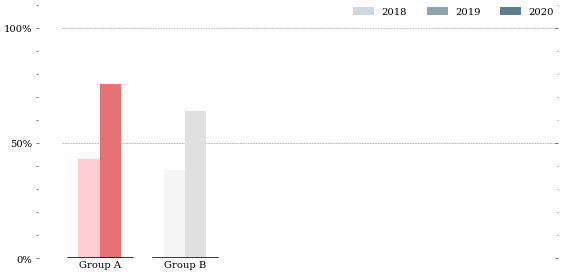

In [ ]:
material = {
    "red": {
        0: "#ffebee",
        1: "#ffcdd2",
        2: "#ef9a9a",
        3: "#e57373",
        4: "#ef5350",
        5: "#f44336",
        6: "#e53935",
        7: "#d32f2f",
        8: "#c62828",
        9: "#b71c1c",
    },
    "pink": {
        0: "#fce4ec",
        1: "#f8bbd0",
        2: "#f48fb1",
        3: "#f06292",
        4: "#ec407a",
        5: "#e91e63",
        6: "#d81b60",
        7: "#c2185b",
        8: "#ad1457",
        9: "#880e4f",
    },
    "purple": {
        0: "#f3e5f5",
        1: "#e1bee7",
        2: "#ce93d8",
        3: "#ba68c8",
        4: "#ab47bc",
        5: "#9c27b0",
        6: "#8e24aa",
        7: "#7b1fa2",
        8: "#6a1b9a",
        9: "#4a148c",
    },
    "deep purple": {
        0: "#ede7f6",
        1: "#d1c4e9",
        2: "#b39ddb",
        3: "#9575cd",
        4: "#7e57c2",
        5: "#673ab7",
        6: "#5e35b1",
        7: "#512da8",
        8: "#4527a0",
        9: "#311b92",
    },
    "indigo": {
        0: "#e8eaf6",
        1: "#c5cae9",
        2: "#9fa8da",
        3: "#7986cb",
        4: "#5c6bc0",
        5: "#3f51b5",
        6: "#3949ab",
        7: "#303f9f",
        8: "#283593",
        9: "#1a237e",
    },
    "blue": {
        0: "#e3f2fd",
        1: "#bbdefb",
        2: "#90caf9",
        3: "#64b5f6",
        4: "#42a5f5",
        5: "#2196f3",
        6: "#1e88e5",
        7: "#1976d2",
        8: "#1565c0",
        9: "#0d47a1",
    },
    "light blue": {
        0: "#e1f5fe",
        1: "#b3e5fc",
        2: "#81d4fa",
        3: "#4fc3f7",
        4: "#29b6f6",
        5: "#03a9f4",
        6: "#039be5",
        7: "#0288d1",
        8: "#0277bd",
        9: "#01579b",
    },
    "cyan": {
        0: "#e0f7fa",
        1: "#b2ebf2",
        2: "#80deea",
        3: "#4dd0e1",
        4: "#26c6da",
        5: "#00bcd4",
        6: "#00acc1",
        7: "#0097a7",
        8: "#00838f",
        9: "#006064",
    },
    "teal": {
        0: "#e0f2f1",
        1: "#b2dfdb",
        2: "#80cbc4",
        3: "#4db6ac",
        4: "#26a69a",
        5: "#009688",
        6: "#00897b",
        7: "#00796b",
        8: "#00695c",
        9: "#004d40",
    },
    "green": {
        0: "#e8f5e9",
        1: "#c8e6c9",
        2: "#a5d6a7",
        3: "#81c784",
        4: "#66bb6a",
        5: "#4caf50",
        6: "#43a047",
        7: "#388e3c",
        8: "#2e7d32",
        9: "#1b5e20",
    },
    "light green": {
        0: "#f1f8e9",
        1: "#dcedc8",
        2: "#c5e1a5",
        3: "#aed581",
        4: "#9ccc65",
        5: "#8bc34a",
        6: "#7cb342",
        7: "#689f38",
        8: "#558b2f",
        9: "#33691e",
    },
    "lime": {
        0: "#f9fbe7",
        1: "#f0f4c3",
        2: "#e6ee9c",
        3: "#dce775",
        4: "#d4e157",
        5: "#cddc39",
        6: "#c0ca33",
        7: "#afb42b",
        8: "#9e9d24",
        9: "#827717",
    },
    "yellow": {
        0: "#fffde7",
        1: "#fff9c4",
        2: "#fff59d",
        3: "#fff176",
        4: "#ffee58",
        5: "#ffeb3b",
        6: "#fdd835",
        7: "#fbc02d",
        8: "#f9a825",
        9: "#f57f17",
    },
    "amber": {
        0: "#fff8e1",
        1: "#ffecb3",
        2: "#ffe082",
        3: "#ffd54f",
        4: "#ffca28",
        5: "#ffc107",
        6: "#ffb300",
        7: "#ffa000",
        8: "#ff8f00",
        9: "#ff6f00",
    },
    "orange": {
        0: "#fff3e0",
        1: "#ffe0b2",
        2: "#ffcc80",
        3: "#ffb74d",
        4: "#ffa726",
        5: "#ff9800",
        6: "#fb8c00",
        7: "#f57c00",
        8: "#ef6c00",
        9: "#e65100",
    },
    "deep orange": {
        0: "#fbe9e7",
        1: "#ffccbc",
        2: "#ffab91",
        3: "#ff8a65",
        4: "#ff7043",
        5: "#ff5722",
        6: "#f4511e",
        7: "#e64a19",
        8: "#d84315",
        9: "#bf360c",
    },
    "brown": {
        0: "#efebe9",
        1: "#d7ccc8",
        2: "#bcaaa4",
        3: "#a1887f",
        4: "#8d6e63",
        5: "#795548",
        6: "#6d4c41",
        7: "#5d4037",
        8: "#4e342e",
        9: "#3e2723",
    },
    "grey": {
        0: "#fafafa",
        1: "#f5f5f5",
        2: "#eeeeee",
        3: "#e0e0e0",
        4: "#bdbdbd",
        5: "#9e9e9e",
        6: "#757575",
        7: "#616161",
        8: "#424242",
        9: "#212121",
    },
    "blue grey": {
        0: "#eceff1",
        1: "#cfd8dc",
        2: "#b0bec5",
        3: "#90a4ae",
        4: "#78909c",
        5: "#607d8b",
        6: "#546e7a",
        7: "#455a64",
        8: "#37474f",
        9: "#263238",
    },
}

import matplotlib.patches as mpatches
with plt.style.context(['science','no-latex']):
    np.random.seed(123)
    plt.figure(figsize=(8, 4))
    ax = plt.subplot(1, 1, 1, frameon=False)


    def bars(origin, color, n, index):
        X = origin + np.arange(n)
        H = 20 * np.random.uniform(1.0, 5.0, n)
        H.sort()

        ax.bar(
            X,
            H,
            width=1.0,
            align="edge",
            color=[material[color][1 + 2 * i] for i in range(n)],
        )
        ax.plot([origin - 0.5, origin + n + 0.5], [0, 0], color="black", lw=2.5)
        ax.text(origin + n / 2, -1, "Group " + index, va="top", ha="center")


    ax.axhline(50, 0.05, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)
    ax.axhline(100, 0.05, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)

    n = 2
    bars(0 * (n + 2), "red", n, "A")
    bars(1 * (n + 2), "grey", n, "B")  # indigo
    # bars(2 * (n + 2), "orange", n, "C")
    # bars(3 * (n + 2), "light green", n, "D")  # teal
    # bars(4 * (n + 2), "pink", n, "E")
    # bars(5 * (n + 2), "light blue", n, "F")  # cyan

    ax.set_xlim(-2, 6 * (n + 2) - 1.5)
    ax.set_xticks([])
    ax.set_ylim(0, 111)
    ax.set_yticks([0, 50, 100])
    ax.set_yticklabels(["0%", "50%", "100%"])


    plt.legend(
        # bbox_to_anchor=(0.0, 1.0, 1.0, 0.1),
        loc="upper right",
        borderaxespad=0.0,
        ncol=3,
        handles=[
            mpatches.Patch(color=material["blue grey"][1], label="2018"),
            mpatches.Patch(color=material["blue grey"][3], label="2019"),
            mpatches.Patch(color=material["blue grey"][5], label="2020"),
        ],
    )


    plt.tight_layout()
    plt.savefig("figures/colored-hist.pdf")
    plt.savefig("figures/colored-hist.jpg")
    plt.show()

In [ ]:
def bars_plot(X, H ,xyparam= None,**pparam):
    with plt.style.context(['science','no-latex']):
        np.random.seed(123)
        fig, ax = plt.subplots()  

In [ ]:
np.random.uniform(1.0, 5.0, n)

array([3.87787588, 2.69242584])

In [ ]:
import matplotlib.patches as mpatches
with plt.style.context(['science','no-latex']):
    np.random.seed(123)
    plt.figure() #figsize=(8, 4)
    ax = plt.subplot(1, 1, 1, frameon=False)


    def bars(origin, color, n, index):
        X = origin + np.arange(n)
        H = 20 * np.random.uniform(1.0, 5.0, n)
        H.sort()

        ax.bar(
            X,
            H,
            width=1.0,
            align="edge",
            color=[material[color][1 + 2 * i] for i in range(n)],
        )
        ax.plot([origin - 0.5, origin + n + 0.5], [0, 0], color="black", lw=2.5)
        ax.text(origin + n / 2, -1, "Group " + index, va="top", ha="center")


    ax.axhline(50, 0.05, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)
    ax.axhline(100, 0.05, 1, color="0.5", linewidth=0.5, linestyle="--", zorder=-10)

    n = 2
    bars(0 * (n + 2), "red", n, "A")
    bars(1 * (n + 2), "grey", n, "B")  # indigo
    # bars(2 * (n + 2), "orange", n, "C")
    # bars(3 * (n + 2), "light green", n, "D")  # teal
    # bars(4 * (n + 2), "pink", n, "E")
    # bars(5 * (n + 2), "light blue", n, "F")  # cyan

    ax.set_xlim(-2, 6 * (n + 2) - 1.5)
    ax.set_xticks([])
    ax.set_ylim(0, 111)
    ax.set_yticks([0, 50, 100])
    ax.set_yticklabels(["0%", "50%", "100%"])


    plt.legend(
        # bbox_to_anchor=(0.0, 1.0, 1.0, 0.1),
        loc="upper right",
        borderaxespad=0.0,
        ncol=3,
        handles=[
            # mpatches.Patch(color=material["blue grey"][1], label="2018"),
            mpatches.Patch(color=material["blue grey"][3], label="2019"),
            mpatches.Patch(color=material["blue grey"][5], label="2020"),
        ],
    )


    plt.tight_layout()
    plt.savefig("figures/colored-hist.pdf")
    plt.savefig("figures/colored-hist.jpg")
    plt.show()

In [ ]:
[np.zeros(len(stdev))+0.25, stdev]

[array([0.25, 0.25, 0.25, 0.25, 0.25]),
 Group_1    1.617069
 Group_2    1.131794
 Group_3    2.170285
 Group_4    0.516051
 Group_5    0.098938
 dtype: float64]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


[0 1]


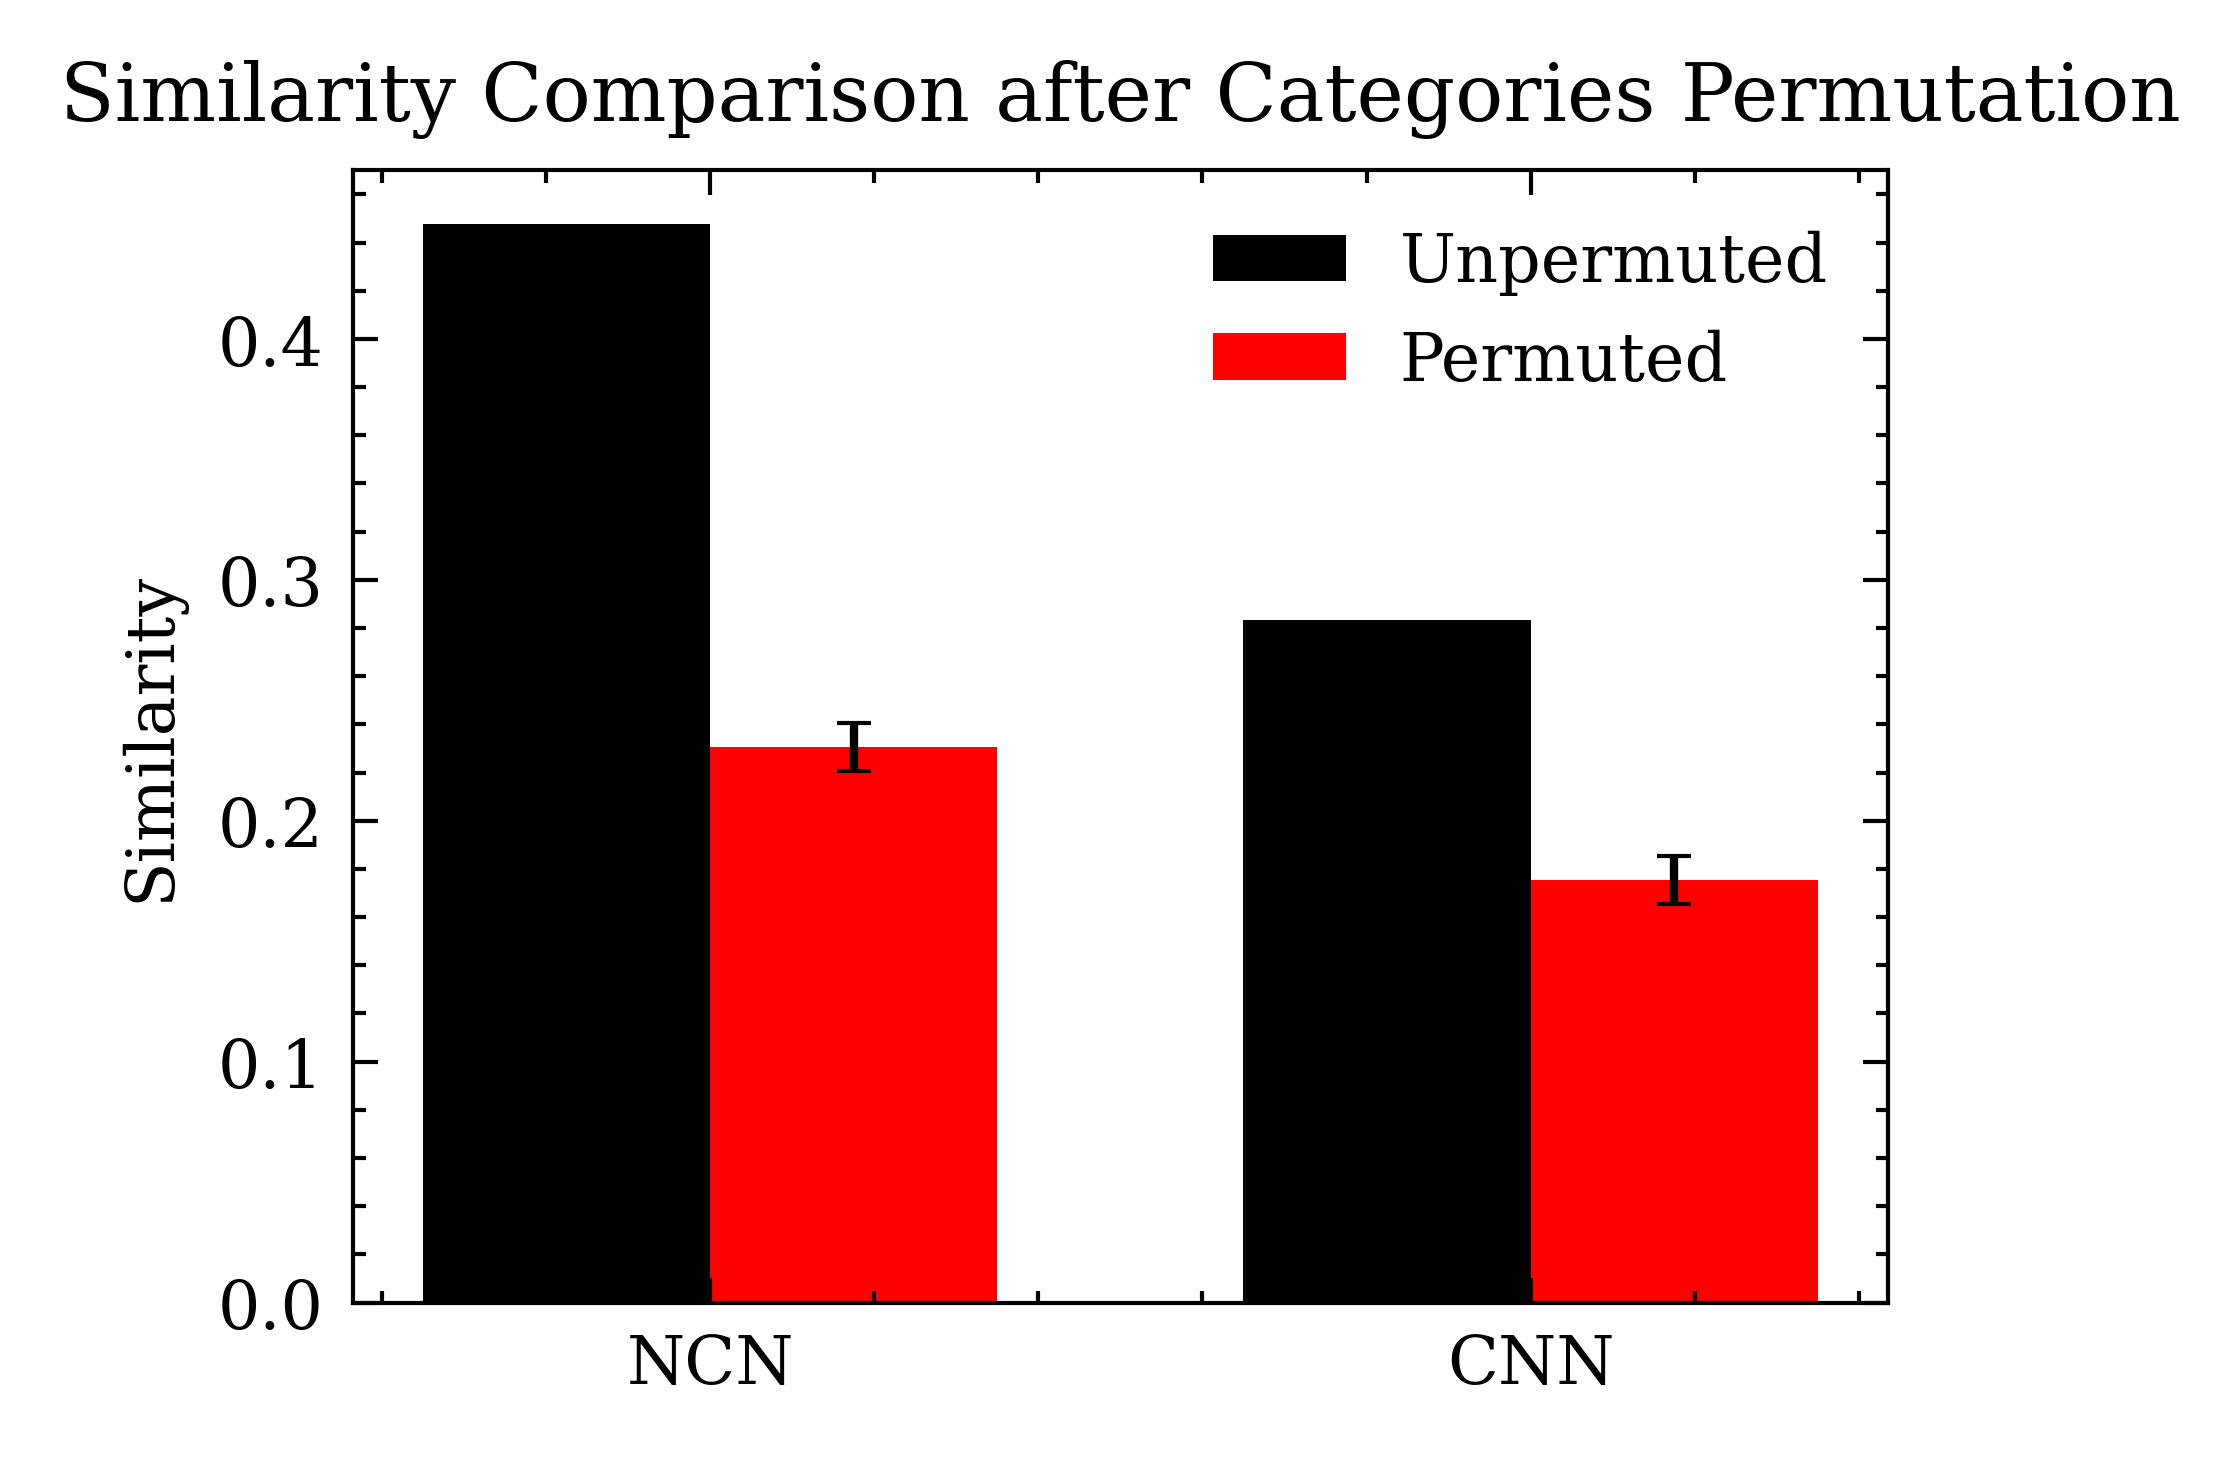

In [ ]:

# with plt.style.context(['science',"ieee",'no-latex']):
#     fig, ax = plt.subplots()

#     # Width of each bar in x-coordinates
#     width = 0.75

#     stdev = data.std()
#     # Positive error bars only
#     error = [np.zeros(len(stdev))+0.25, stdev]

#     # ax.bar(x-0.5, means, color='lightblue', edgecolor = "black", width=width/2, yerr=error, error_kw=error_kw, align='center')
#     ax.bar(x, means, color='lightgreen',edgecolor = "black", width=width/2, yerr=error, error_kw=error_kw, align='center')
#     ax.bar(x+0.5, means, color='lightgrey',edgecolor = "black", width=width/2, yerr=error, error_kw=error_kw, align='center')

#     ax.set_xlim(xlims)
#     ax.set_ylim(0, 15)

xlabels = ['NCN', 'CNN']
listA = [1-0.552285,1-0.716834]
listB = [0.2305,0.175554]
errorA = [0,0]
errorB = [0.01,0.01]
error_kw = {'capsize': 2, 'capthick': 0.5, 'ecolor': 'black'}
ylabel = 'Similarity'
title = 'Similarity Comparison after Categories Permutation'
labels = ["Unpermuted","Permuted"]
def plot_bar_wo_error(listA,listB, xlabels, ylabel,title,labels):
    with plt.style.context(['science',"ieee",'no-latex']):
        x = np.arange(len(xlabels))  # the label locations
        print(x)
        width = 0.35  # the width of the bars

        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width/2, listA, width, error_kw=error_kw,label=labels[0])  # , yerr=errorA
        rects2 = ax.bar(x + width/2,  listB, width, yerr=errorB, error_kw=error_kw, label=labels[1])  # yerr=[0.01,0.01],

        # Add some text for labels, title and custom x-axis tick labels, etc.

        ax.set_xticks(x, xlabels)
        ax.set_ylabel(ylabel)
        ax.set_title(title)

        # ax.set_xticklabels(['NCN','','','', 'CNN'])
        
        ax.legend()
        ax.autoscale()  # tight=True

        # ax.bar_label(rects1, padding=3)
        # ax.bar_label(rects2, padding=3)

        # fig.tight_layout()
    
        fig.savefig(f'figures/figBar.svg')
        fig.savefig(f'figures/figBar.jpg', dpi=300)
    plt.show()

plot_bar_wo_error(listA,listB, xlabels, ylabel,title, labels )

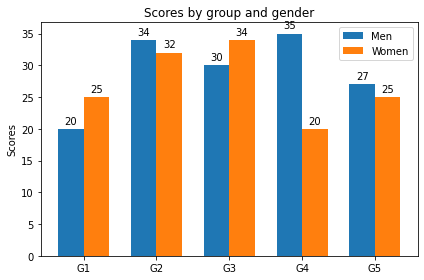

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

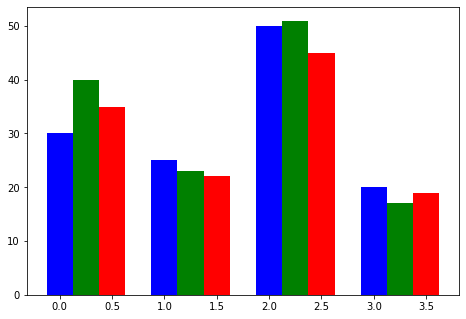

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

plt.savefig("D:\\3F_Career_Development\\3-2_Work\\Codebase/AllAbout_DeepLearning/Visulization/test.png",dpi = 600)

In [ ]:

N = 5
menMeans = (20, 35, 30, 35, -27)
womenMeans = (25, 32, 34, 20, -25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

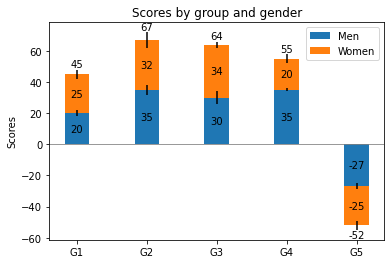

In [ ]:
fig, ax = plt.subplots()

p1 = ax.bar(ind, menMeans, width, yerr=menStd, label='Men')
p2 = ax.bar(ind, womenMeans, width,
            bottom=menMeans, yerr=womenStd, label='Women')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()

In [ ]:
import plotly.graph_objects as go

x =  ['LCN', 'NCN', 'CNN']


y = [80.9, 87.4, 88.3]


# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])

fig.show()